In [33]:
!pip install catboost

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from catboost import CatBoostClassifier
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt

In [3]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    return summary

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive"


'2012-07-29 010.JPG'
'2012-11-10 001.JPG'
 20131127_193304.jpg
'20170704_213023 (1).jpg'
 20170704_213023.jpg
'2320 roster (1).gsheet'
'2320 roster.gsheet'
'2414 Roster.xlsx'
 360Connect--Introduction-to-Parent-Portal-and-App.gdoc
'A&M'
'API assignment.ipynb'
'AP Stat Fall Final exam review.PDF'
'bztm6e_ppt_03_04 (3).ppt'
'Cancer Epidemiology  '
 canon
'Challenge: Which model? Assignment.gdoc'
'Challenge: Which model?.gdoc'
'CHP 7.1-7.2.gslides'
'CHP 7.1-7.2.pptx'
'Colab Notebooks'
'Colab project.ipynb'
'Copy of LinkedIn Friendly Cold Outreach Templates.gdoc'
'Copy of NETWORKING MESSAGE FORMAT.gdoc'
'Copy of nyts2018.xlsx'
'Copy of Tech Industry Media Resources List.gdoc'
' Data Is Plural — Structured Archive.gsheet'
'Design System Planning .gdoc'
 DQ12.gdoc
'End-of-Year Goal Reflection.gdoc'
'Evidence Summary Table 2.docx'
'Evidence Summary Table 2.docx.gdoc'
'Evidence Summary Table .gsheet'
'Ex 2 Mohammad Nosrati .docx'
'EX 2 Mohammad Nosrati Do.do'
'EX 2 Mohammad Nosrati log.log'
'G

# New Section

In [35]:
df = pd.read_csv("Thinkful Data Science Projects/Datasets/samp_gravity.csv",sep=",")

In [ ]:
df.value_counts()

year  iso_o  iso_d  contig  comlang_off  distw         pop_o       gdp_o         gdpcap_o      iso2_o  pop_d       gdp_d          gdpcap_d     iso2_d  heg_d  conflict  indepdate  heg_o  col_to  col_fr  col_hist  col_cur  sever   sib_conflict  gatt_o  gatt_d  rta  comleg  comcur  acp_to_eu  gsp  eu_to_acp  gsp_rec  flow        validmirror  family
2006  USA    PHL    0       1            13153.975615  298.988098  1.320182e+07  44155.000000  US      84.589760   116931.343750  1382.334473  PH      0      0.0       1946.0     1      1       0       1         0        1820.0  0.0           1       1       0    0       0       0          0    0          1        8403.52000  1            USA       1
1974  AUS    PNG    0       1            3087.280059   13.723000   1.002871e+05  7307.955566   AU      2.798718    1467.346069    524.292236   PG      0      0.0       1975.0     1      1       0       1         1        1901.0  0.0           1       0       0    1       0       0          0    0  

In [ ]:
df.head()

,year,iso_o,iso_d,contig,comlang_off,distw,pop_o,gdp_o,gdpcap_o,iso2_o,pop_d,gdp_d,gdpcap_d,iso2_d,heg_d,conflict,indepdate,heg_o,col_to,col_fr,col_hist,col_cur,sever,sib_conflict,gatt_o,gatt_d,rta,comleg,comcur,acp_to_eu,gsp,eu_to_acp,gsp_rec,flow,validmirror,family
0,1999,ABW,AGO,0,0,9587.315563,NaN,1722.905029,NaN,AW,13.500820,6154.479980,455.859711,AO,0,NaN,NaN,0,0,0,0,0,NaN,NaN,0,1,0,1,0,0,0,0,0,0.0,0,NaN
1,2000,ABW,AGO,0,0,9587.315563,NaN,1858.659180,NaN,AW,13.840636,9129.179688,659.592468,AO,0,NaN,NaN,0,0,0,0,0,NaN,NaN,0,1,0,1,0,0,0,0,0,0.0,1,NaN
2,2001,ABW,AGO,0,0,9587.315563,NaN,1898.882690,NaN,AW,14.214834,8936.023438,628.640686,AO,0,NaN,NaN,0,0,0,0,0,NaN,NaN,0,1,0,1,0,0,0,0,0,0.0,1,NaN
3,2002,ABW,AGO,0,0,9587.315563,NaN,1911.173218,NaN,AW,14.618782,11431.738281,781.989807,AO,0,NaN,NaN,0,0,0,0,0,NaN,NaN,0,1,0,1,0,0,0,0,0,0.0,1,NaN
4,2003,ABW,AGO,0,0,9587.315563,0.099,NaN,NaN,AW,15.046907,13956.267578,927.517334,AO,0,NaN,NaN,0,0,0,0,0,NaN,NaN,0,1,0,1,0,0,0,0,0,0.0,1,NaN


In [ ]:
print ("Total number of rows in dataset = {}".format(df.shape[0]))
print ("Total number of columns in dataset = {}".format(df.shape[1]))

Total number of rows in dataset = 1204671
Total number of columns in dataset = 36


In [ ]:
df2=df.dropna()

In [ ]:
print ("Total number of rows in dataset = {}".format(df2.shape[0]))
print ("Total number of columns in dataset = {}".format(df2.shape[1]))

Total number of rows in dataset = 500
Total number of columns in dataset = 36


In [ ]:
result = resumetable(df)
result

Dataset Shape: (1204671, 36)


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,year,int64,0,59,1999,2000
1,iso_o,object,0,208,ABW,ABW
2,iso_d,object,0,208,AGO,AGO
3,contig,int64,0,2,0,0
4,comlang_off,int64,0,2,0,0
5,distw,float64,0,32094,9587.32,9587.32
6,pop_o,float64,68397,9424,NaN,NaN
7,gdp_o,float64,171252,8348,1722.91,1858.66
8,gdpcap_o,float64,174471,8322,NaN,NaN
9,iso2_o,object,3316,206,AW,AW


In [ ]:
df.dtypes

year              int64
iso_o            object
iso_d            object
contig            int64
comlang_off       int64
distw           float64
pop_o           float64
gdp_o           float64
gdpcap_o        float64
iso2_o           object
pop_d           float64
gdp_d           float64
gdpcap_d        float64
iso2_d           object
heg_d             int64
conflict        float64
indepdate       float64
heg_o             int64
col_to            int64
col_fr            int64
col_hist          int64
col_cur           int64
sever           float64
sib_conflict    float64
gatt_o            int64
gatt_d            int64
rta               int64
comleg            int64
comcur            int64
acp_to_eu         int64
gsp               int64
eu_to_acp         int64
gsp_rec           int64
flow            float64
validmirror       int64
family           object
dtype: object

In [ ]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression

import missingno as msno

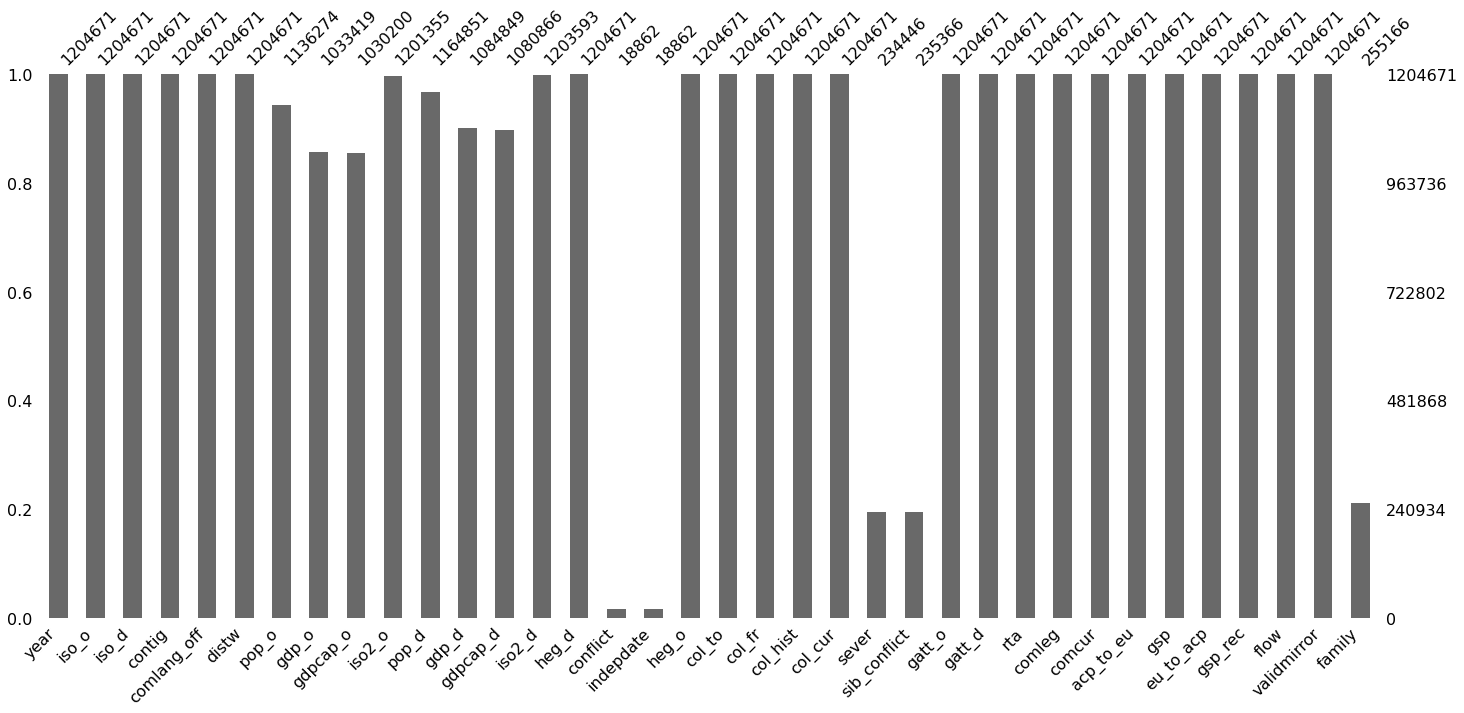

In [ ]:
msno.bar(df)

In [ ]:
# Find how much data is missing in each column
# Function to look at missing rows per column
def missing(dataset):
    columns = dataset.columns
    print('MISSING ROWS per COLUMN')
    for column in columns:
        percentage = (dataset[column].isnull().sum() / len(df)) * 100
        print('{}: {}, {:0.2f}%'.format(column, dataset[column].isnull().sum(), percentage))
        
        
# Missing rows per column       
missing(df)

MISSING ROWS per COLUMN
year: 0, 0.00%
iso_o: 0, 0.00%
iso_d: 0, 0.00%
contig: 0, 0.00%
comlang_off: 0, 0.00%
distw: 0, 0.00%
pop_o: 68397, 5.68%
gdp_o: 171252, 14.22%
gdpcap_o: 174471, 14.48%
iso2_o: 3316, 0.28%
pop_d: 39820, 3.31%
gdp_d: 119822, 9.95%
gdpcap_d: 123805, 10.28%
iso2_d: 1078, 0.09%
heg_d: 0, 0.00%
conflict: 1185809, 98.43%
indepdate: 1185809, 98.43%
heg_o: 0, 0.00%
col_to: 0, 0.00%
col_fr: 0, 0.00%
col_hist: 0, 0.00%
col_cur: 0, 0.00%
sever: 970225, 80.54%
sib_conflict: 969305, 80.46%
gatt_o: 0, 0.00%
gatt_d: 0, 0.00%
rta: 0, 0.00%
comleg: 0, 0.00%
comcur: 0, 0.00%
acp_to_eu: 0, 0.00%
gsp: 0, 0.00%
eu_to_acp: 0, 0.00%
gsp_rec: 0, 0.00%
flow: 0, 0.00%
validmirror: 0, 0.00%
family: 949505, 78.82%


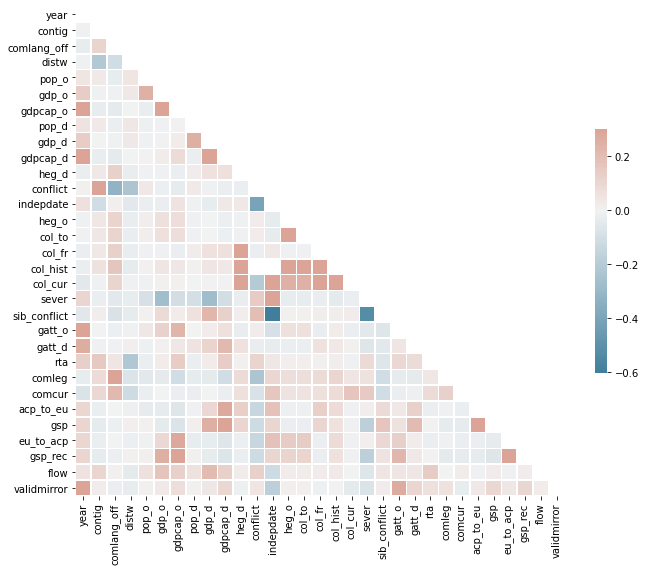

,year,contig,comlang_off,distw,pop_o,gdp_o,gdpcap_o,pop_d,gdp_d,gdpcap_d,heg_d,conflict,indepdate,heg_o,col_to,col_fr,col_hist,col_cur,sever,sib_conflict,gatt_o,gatt_d,rta,comleg,comcur,acp_to_eu,gsp,eu_to_acp,gsp_rec,flow,validmirror
year,1.000000,-0.009449,-0.030092,-0.003792,0.048755,0.136330,0.346046,0.049674,0.139321,0.353173,-0.023809,0.003688,0.067084,-0.006635,-0.006635,-0.023809,-0.022000,-0.052248,0.111346,-0.054948,0.328403,0.261218,0.130428,-0.030711,-0.077449,0.101327,0.107530,0.099908,0.107434,0.051431,0.306198
contig,-0.009449,1.000000,0.115638,-0.212060,0.029344,-0.004461,-0.029762,0.030731,-0.003458,-0.027319,0.038325,0.309818,-0.108358,0.041796,0.041796,0.038325,0.056791,-0.008665,-0.018664,0.017185,-0.000637,-0.008846,0.155845,0.085775,0.092954,-0.021711,-0.034513,-0.021463,-0.034549,0.108885,0.018002
comlang_off,-0.030092,0.115638,1.000000,-0.108692,-0.028975,-0.008732,-0.041678,-0.019431,-0.007732,-0.041954,0.122839,-0.324287,0.013541,0.113066,0.113066,0.122839,0.167667,0.115010,-0.052995,-0.082534,-0.016829,-0.009079,0.045776,0.377573,0.216033,-0.002847,-0.016689,-0.002025,-0.016937,0.010302,-0.023496
distw,-0.003792,-0.212060,-0.108692,1.000000,0.047344,0.034243,-0.003117,0.040942,0.033115,-0.003294,-0.025001,-0.231854,-0.047890,-0.026765,-0.026765,-0.025001,-0.036704,-0.006079,-0.028883,-0.038285,-0.007822,0.011791,-0.219649,-0.071034,-0.118572,-0.012461,0.010542,-0.016123,0.010168,-0.041778,-0.031704
pop_o,0.048755,0.029344,-0.028975,0.047344,1.000000,0.248118,-0.026601,-0.012112,-0.003906,0.002044,-0.010409,0.033817,-0.023695,0.017276,0.017276,-0.010409,0.004880,-0.005315,-0.090507,0.003529,0.041602,-0.011994,-0.018792,-0.047338,-0.022185,-0.032220,0.008001,-0.005640,0.010869,0.063742,0.006922
gdp_o,0.136330,-0.004461,-0.008732,0.034243,0.248118,1.000000,0.430279,-0.003917,0.002912,0.027282,-0.004164,-0.015570,-0.020970,0.065298,0.065298,-0.004164,0.045164,0.005068,-0.271531,0.090831,0.118464,0.007556,0.026716,-0.041971,-0.002208,-0.032151,-0.040129,0.095036,0.256044,0.172907,0.028836
gdpcap_o,0.346046,-0.029762,-0.041678,-0.003117,-0.026601,0.430279,1.000000,0.002745,0.028018,0.086367,-0.018644,-0.037053,0.054390,0.071944,0.071944,-0.018644,0.040232,0.009169,-0.101274,0.025712,0.230409,0.041066,0.134475,-0.107125,-0.018788,-0.060625,-0.072977,0.279569,0.439713,0.122151,0.071175
pop_d,0.049674,0.030731,-0.019431,0.040942,-0.012112,-0.003917,0.002745,1.000000,0.254763,-0.022337,0.018400,0.028213,-0.007435,-0.008847,-0.008847,0.018400,0.007786,-0.000777,-0.097345,0.061289,-0.001714,0.050460,-0.018383,-0.037456,-0.019678,-0.005476,0.012044,-0.031830,0.008886,0.059848,0.006394
gdp_d,0.139321,-0.003458,-0.007732,0.033115,-0.003906,0.002912,0.028018,0.254763,1.000000,0.429529,0.060679,-0.007435,-0.029964,-0.003072,-0.003072,0.060679,0.044067,0.003035,-0.273496,0.221957,0.020195,0.115693,0.027827,-0.040241,-0.003146,0.095373,0.256513,-0.030600,-0.037963,0.209533,0.039229
gdpcap_d,0.353173,-0.027319,-0.041954,-0.003294,0.002044,0.027282,0.086367,-0.022337,0.429529,1.000000,0.063794,-0.023594,0.036371,-0.016159,-0.016159,0.063794,0.037906,0.002294,-0.101479,0.122476,0.068683,0.215958,0.135381,-0.106367,-0.020739,0.279809,0.437729,-0.057080,-0.068099,0.126830,0.099665


In [ ]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
s = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


plt.show()
corr

In [36]:
# Drop all columns with more than 50% of it's values missing
df_dc = df[df.columns[df.isnull().mean() < 0.5]]
df_dc.head()

,year,iso_o,iso_d,contig,comlang_off,distw,pop_o,gdp_o,gdpcap_o,iso2_o,...,gatt_d,rta,comleg,comcur,acp_to_eu,gsp,eu_to_acp,gsp_rec,flow,validmirror
0,1999,ABW,AGO,0,0,9587.315563,NaN,1722.905029,NaN,AW,...,1,0,1,0,0,0,0,0,0.0,0
1,2000,ABW,AGO,0,0,9587.315563,NaN,1858.659180,NaN,AW,...,1,0,1,0,0,0,0,0,0.0,1
2,2001,ABW,AGO,0,0,9587.315563,NaN,1898.882690,NaN,AW,...,1,0,1,0,0,0,0,0,0.0,1
3,2002,ABW,AGO,0,0,9587.315563,NaN,1911.173218,NaN,AW,...,1,0,1,0,0,0,0,0,0.0,1
4,2003,ABW,AGO,0,0,9587.315563,0.099,NaN,NaN,AW,...,1,0,1,0,0,0,0,0,0.0,1


In [7]:
df_num=df_dc.drop(['iso_o','iso_d','iso2_o','iso2_d'],axis=1)
df_num.head()

,year,contig,comlang_off,distw,pop_o,gdp_o,gdpcap_o,pop_d,gdp_d,gdpcap_d,...,gatt_d,rta,comleg,comcur,acp_to_eu,gsp,eu_to_acp,gsp_rec,flow,validmirror
0,1999,0,0,9587.315563,NaN,1722.905029,NaN,13.500820,6154.479980,455.859711,...,1,0,1,0,0,0,0,0,0.0,0
1,2000,0,0,9587.315563,NaN,1858.659180,NaN,13.840636,9129.179688,659.592468,...,1,0,1,0,0,0,0,0,0.0,1
2,2001,0,0,9587.315563,NaN,1898.882690,NaN,14.214834,8936.023438,628.640686,...,1,0,1,0,0,0,0,0,0.0,1
3,2002,0,0,9587.315563,NaN,1911.173218,NaN,14.618782,11431.738281,781.989807,...,1,0,1,0,0,0,0,0,0.0,1
4,2003,0,0,9587.315563,0.099,NaN,NaN,15.046907,13956.267578,927.517334,...,1,0,1,0,0,0,0,0,0.0,1


In [37]:
for col in  df_num.columns:
    df_num[col] = pd.to_numeric(df_num[col], errors='coerce')


In [ ]:
df_num.dtypes

year             int64
contig           int64
comlang_off      int64
distw          float64
pop_o          float64
gdp_o          float64
gdpcap_o       float64
pop_d          float64
gdp_d          float64
gdpcap_d       float64
heg_d            int64
heg_o            int64
col_to           int64
col_fr           int64
col_hist         int64
col_cur          int64
gatt_o           int64
gatt_d           int64
rta              int64
comleg           int64
comcur           int64
acp_to_eu        int64
gsp              int64
eu_to_acp        int64
gsp_rec          int64
flow           float64
validmirror      int64
dtype: object

In [9]:
df_num["gdp_o"] = pd.to_numeric(df_num["gdp_o"])


In [10]:
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 
# One of the best notebooks on getting started with a ML problem.

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [11]:
df_num_missing= missing_values_table(df_num)
df_num_missing

Your selected dataframe has 27 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
gdpcap_o,174471,14.5
gdp_o,171252,14.2
gdpcap_d,123805,10.3
gdp_d,119822,9.9
pop_o,68397,5.7
pop_d,39820,3.3


## Detecting missing data visually using Missingno library

## Visualizing the locations of the missing data

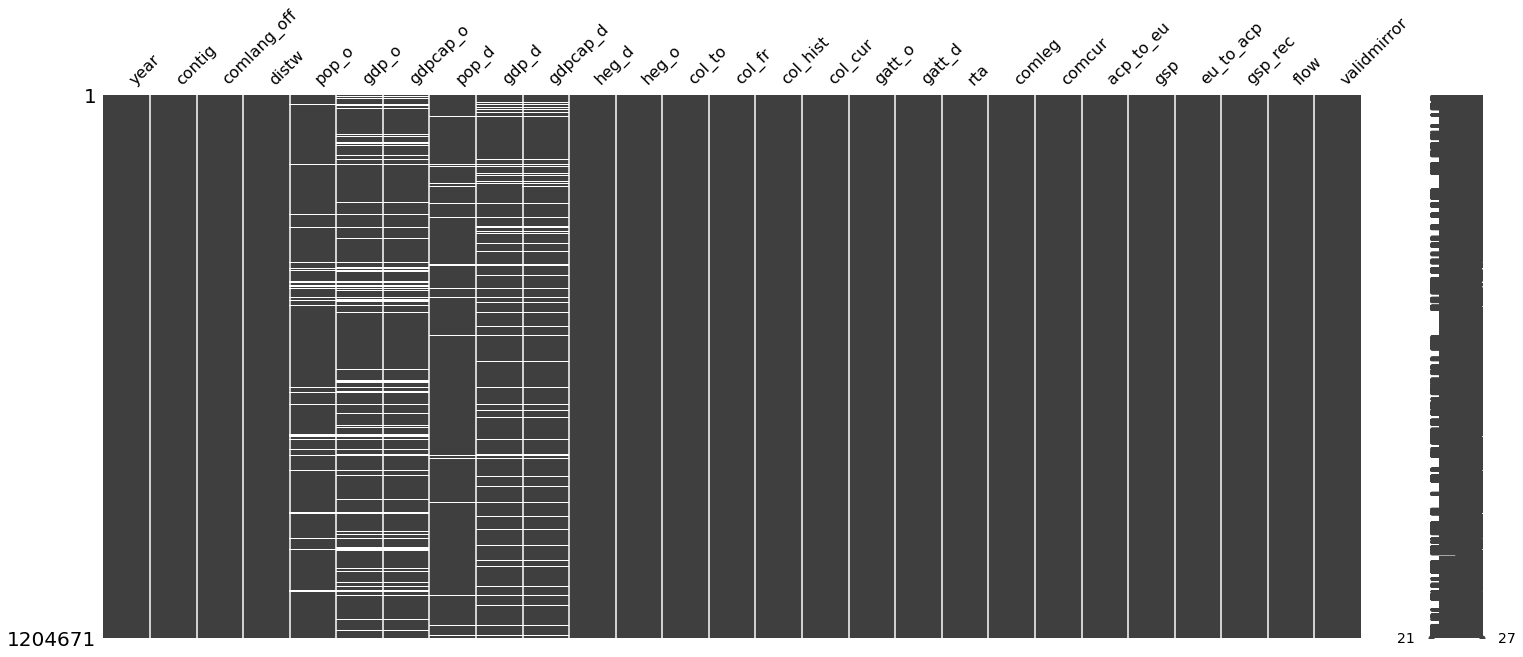

In [ ]:
msno.matrix(df_num)

In [ ]:
df_num.dtypes

year             int64
contig           int64
comlang_off      int64
distw          float64
pop_o          float64
gdp_o          float64
gdpcap_o       float64
pop_d          float64
gdp_d          float64
gdpcap_d       float64
heg_d            int64
heg_o            int64
col_to           int64
col_fr           int64
col_hist         int64
col_cur          int64
gatt_o           int64
gatt_d           int64
rta              int64
comleg           int64
comcur           int64
acp_to_eu        int64
gsp              int64
eu_to_acp        int64
gsp_rec          int64
flow           float64
validmirror      int64
dtype: object

In [ ]:
df_num

,year,contig,comlang_off,distw,pop_o,gdp_o,gdpcap_o,pop_d,gdp_d,gdpcap_d,heg_d,heg_o,col_to,col_fr,col_hist,col_cur,gatt_o,gatt_d,rta,comleg,comcur,acp_to_eu,gsp,eu_to_acp,gsp_rec,flow,validmirror
0,1999,0,0,9587.315563,NaN,1722.905029,NaN,13.500820,6154.479980,455.859711,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.0000,0
1,2000,0,0,9587.315563,NaN,1858.659180,NaN,13.840636,9129.179688,659.592468,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.0000,1
2,2001,0,0,9587.315563,NaN,1898.882690,NaN,14.214834,8936.023438,628.640686,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.0000,1
3,2002,0,0,9587.315563,NaN,1911.173218,NaN,14.618782,11431.738281,781.989807,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.0000,1
4,2003,0,0,9587.315563,0.099000,NaN,NaN,15.046907,13956.267578,927.517334,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204666,2002,1,1,583.795373,12.785585,21897.027344,1712.633911,11.101816,3696.721680,332.983521,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,136.3582,1
1204667,2003,1,1,583.795373,12.863138,7397.224121,575.071472,11.291162,4326.579590,383.182861,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,198.3980,1
1204668,2004,1,1,583.795373,12.936295,4712.289062,364.268829,11.478886,5423.012207,472.433685,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,124.4060,1
1204669,2005,1,1,583.795373,13.009534,3418.093506,262.737579,11.668457,7270.074707,623.053650,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,110.4160,1


## SimpleImputer

In [38]:
## SimpleImputer
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
data_with_imputed_values = my_imputer.fit_transform(df_num)

In [ ]:
data_with_imputed_values

array([[1.99900e+03, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.00000e+03, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [2.00100e+03, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       ...,
       [2.00400e+03, 1.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        1.24406e+02, 1.00000e+00],
       [2.00500e+03, 1.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        1.10416e+02, 1.00000e+00],
       [2.00600e+03, 1.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        1.75101e+02, 1.00000e+00]])

In [39]:
new_data = pd.DataFrame(data_with_imputed_values,columns=df_num.columns)


In [ ]:
new_data.isnull().sum()

year           0
contig         0
comlang_off    0
distw          0
pop_o          0
gdp_o          0
gdpcap_o       0
pop_d          0
gdp_d          0
gdpcap_d       0
heg_d          0
heg_o          0
col_to         0
col_fr         0
col_hist       0
col_cur        0
gatt_o         0
gatt_d         0
rta            0
comleg         0
comcur         0
acp_to_eu      0
gsp            0
eu_to_acp      0
gsp_rec        0
flow           0
validmirror    0
dtype: int64

In [15]:
new_data.head()

,year,contig,comlang_off,distw,pop_o,gdp_o,gdpcap_o,pop_d,gdp_d,gdpcap_d,...,gatt_d,rta,comleg,comcur,acp_to_eu,gsp,eu_to_acp,gsp_rec,flow,validmirror
0,1999.0,0.0,0.0,9587.315563,32.596779,1722.905029,4553.223075,13.500820,6154.479980,455.859711,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2000.0,0.0,0.0,9587.315563,32.596779,1858.659180,4553.223075,13.840636,9129.179688,659.592468,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2001.0,0.0,0.0,9587.315563,32.596779,1898.882690,4553.223075,14.214834,8936.023438,628.640686,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2002.0,0.0,0.0,9587.315563,32.596779,1911.173218,4553.223075,14.618782,11431.738281,781.989807,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2003.0,0.0,0.0,9587.315563,0.099000,134662.119236,4553.223075,15.046907,13956.267578,927.517334,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Find how much data is missing in each column
# Function to look at missing rows per column
def missing(dataset):
    columns = dataset.columns
    print('MISSING ROWS per COLUMN')
    for column in columns:
        percentage = (dataset[column].isnull().sum() / len(new_data)) * 100
        print('{}: {}, {:0.2f}%'.format(column, dataset[column].isnull().sum(), percentage))
        
        
# Missing rows per column       
missing(new_data)

MISSING ROWS per COLUMN
year: 0, 0.00%
contig: 0, 0.00%
comlang_off: 0, 0.00%
distw: 0, 0.00%
pop_o: 0, 0.00%
gdp_o: 0, 0.00%
gdpcap_o: 0, 0.00%
pop_d: 0, 0.00%
gdp_d: 0, 0.00%
gdpcap_d: 0, 0.00%
heg_d: 0, 0.00%
heg_o: 0, 0.00%
col_to: 0, 0.00%
col_fr: 0, 0.00%
col_hist: 0, 0.00%
col_cur: 0, 0.00%
gatt_o: 0, 0.00%
gatt_d: 0, 0.00%
rta: 0, 0.00%
comleg: 0, 0.00%
comcur: 0, 0.00%
acp_to_eu: 0, 0.00%
gsp: 0, 0.00%
eu_to_acp: 0, 0.00%
gsp_rec: 0, 0.00%
flow: 0, 0.00%
validmirror: 0, 0.00%


In [ ]:
new_data.dtypes

year           float64
contig         float64
comlang_off    float64
distw          float64
pop_o          float64
gdp_o          float64
gdpcap_o       float64
pop_d          float64
gdp_d          float64
gdpcap_d       float64
heg_d          float64
heg_o          float64
col_to         float64
col_fr         float64
col_hist       float64
col_cur        float64
gatt_o         float64
gatt_d         float64
rta            float64
comleg         float64
comcur         float64
acp_to_eu      float64
gsp            float64
eu_to_acp      float64
gsp_rec        float64
flow           float64
validmirror    float64
dtype: object

## Catboost

In [40]:
# fraction of rows 
  
# here you get 20 % row from the df 
# make put into another dataframe df1 
test = new_data.sample(frac =.2) 
  
# Now select 80 % rows from df1 
train=new_data.sample(frac =.80) 

In [ ]:
test.head()

,year,contig,comlang_off,distw,pop_o,gdp_o,gdpcap_o,pop_d,gdp_d,gdpcap_d,heg_d,heg_o,col_to,col_fr,col_hist,col_cur,gatt_o,gatt_d,rta,comleg,comcur,acp_to_eu,gsp,eu_to_acp,gsp_rec,flow,validmirror
938976,1972.0,0.0,0.0,6951.818355,131.909348,467021.000000,3540.469238,3.577488,246.804581,68.988235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
957349,1948.0,0.0,0.0,4387.183872,32.596779,134662.119236,4553.223075,32.217031,130025.261842,4434.454886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
221951,1975.0,1.0,1.0,821.752646,7.563152,2752.770508,363.971344,61.162926,27778.935547,454.179321,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.2159,1.0
344377,1988.0,0.0,0.0,11790.692405,38.691002,365231.406250,9439.699219,58.294064,37885.484375,649.902954,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,40.3200,1.0
807684,1986.0,0.0,1.0,773.241821,3.612903,2885.800049,798.748230,2.221407,5613.700195,2527.092285,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.3398,1.0


In [ ]:
train.head()

,year,contig,comlang_off,distw,pop_o,gdp_o,gdpcap_o,pop_d,gdp_d,gdpcap_d,heg_d,heg_o,col_to,col_fr,col_hist,col_cur,gatt_o,gatt_d,rta,comleg,comcur,acp_to_eu,gsp,eu_to_acp,gsp_rec,flow,validmirror
1042573,2006.0,0.0,0.0,6054.629221,0.085757,749.859558,8743.981445,84.108101,6.088382e+04,723.875793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0
648361,1997.0,0.0,1.0,2427.874867,2.480401,295.899994,119.295219,13.937233,9.840550e+03,706.061951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0
992819,1950.0,0.0,0.0,3841.624459,2.087000,134662.119236,4553.223075,3.517000,1.300253e+05,4434.454886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
312620,1993.0,0.0,0.0,16222.994906,7.723110,9744.663086,1261.753784,65.450294,5.436818e+04,830.678955,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0
981936,1989.0,0.0,1.0,15122.620388,2.931000,30117.035156,10275.344727,246.819000,5.441700e+06,22047.330078,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,11475.75,1.0


In [41]:
train_df=train
test_df = test

In [42]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score

In [43]:
#Creating a training set for modeling and validation set to check model performance
X = train.drop(['gdp_o'], axis=1)
y = train.gdp_o

from sklearn.model_selection import train_test_split
X_train, X_vaidation, y_train, y_validation = train_test_split(X, y, train_size=0.7, random_state=1234)

In [25]:
#Look at the data type of variables
X.dtypes

year           float64
contig         float64
comlang_off    float64
distw          float64
pop_o          float64
gdpcap_o       float64
pop_d          float64
gdp_d          float64
gdpcap_d       float64
heg_d          float64
heg_o          float64
col_to         float64
col_fr         float64
col_hist       float64
col_cur        float64
gatt_o         float64
gatt_d         float64
rta            float64
comleg         float64
comcur         float64
acp_to_eu      float64
gsp            float64
eu_to_acp      float64
gsp_rec        float64
flow           float64
validmirror    float64
dtype: object

In [44]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [45]:
#importing library and building model
from catboost import CatBoostRegressor
model=CatBoostRegressor(iterations=1000, depth=3, learning_rate=0.1, loss_function='RMSE')
model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_vaidation, y_validation),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 541998.6995153	test: 554938.5296616	best: 554938.5296616 (0)	total: 71.6ms	remaining: 1m 11s
1:	learn: 500184.0756864	test: 511538.2733885	best: 511538.2733885 (1)	total: 120ms	remaining: 59.8s
2:	learn: 460925.4569698	test: 471190.8124004	best: 471190.8124004 (2)	total: 168ms	remaining: 55.8s
3:	learn: 426323.9658293	test: 435518.5647189	best: 435518.5647189 (3)	total: 232ms	remaining: 57.8s
4:	learn: 393610.4473447	test: 402267.9432152	best: 402267.9432152 (4)	total: 286ms	remaining: 57s
5:	learn: 364949.5231902	test: 372982.3890952	best: 372982.3890952 (5)	total: 348ms	remaining: 57.7s
6:	learn: 339258.8504729	test: 346436.0212600	best: 346436.0212600 (6)	total: 408ms	remaining: 57.9s
7:	learn: 315779.4160576	test: 321853.0484833	best: 321853.0484833 (7)	total: 462ms	remaining: 57.3s
8:	learn: 295450.2128453	test: 301188.6133609	best: 301188.6133609 (8)	total: 524ms	remaining: 57.7s
9:	learn: 275029.0936697	test: 280645.4462856	best: 280645.4462856 (9)	total: 584ms	remaini

In [ ]:
submission = pd.DataFrame()
submission['distw'] = test['distw']
submission['gdp_o'] = test['gdp_o']
submission['distw'] = model.predict(test)
submission.to_csv("Submission.csv")

In [ ]:
submission

,distw,gdp_o
938976,477382.810106,467021.000000
957349,133154.328829,134662.119236
221951,2994.105539,2752.770508
344377,400727.921871,365231.406250
807684,3667.291798,2885.800049
...,...,...
485974,166311.681046,144229.968750
1119592,106416.087395,106110.890625
115707,9374.142546,2817.900146
335786,84343.988315,82923.687500


In [ ]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

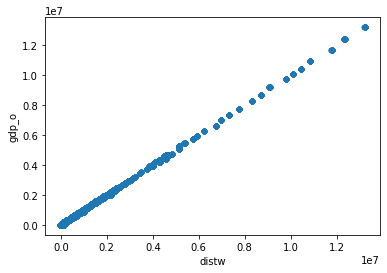

In [ ]:
submission.plot.scatter(x='distw',y='gdp_o')

##  Regression Models

## Random_Forest_Regression_using_Scikit_Learn.ipynb

In [ ]:
#import libraries for pre-processing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from dateutil.parser import parse
from datetime import datetime
from scipy.stats import norm

# import all what you need for machine learning
import sklearn
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 42)

In [ ]:
#fit decision tree
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)
#fit random forest
forest = RandomForestRegressor(n_jobs=-1)
forest.fit(x_train, y_train)
#fit regression
lin_reg = LinearRegression(n_jobs=-1)
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [ ]:
models= [('lin_reg', lin_reg), ('random forest', forest), ('decision tree', tree), ('Catboost', model)]
from sklearn.metrics import mean_squared_error
for i, model in models:    
    predictions = model.predict(x_train)
    MSE = mean_squared_error(y_train, predictions)
    RMSE = np.sqrt(MSE)
    msg = "%s = %.2f" % (i, round(RMSE, 2))
    print('RMSE of', msg)

RMSE of lin_reg = 509104.44
RMSE of random forest = 1468.11
RMSE of decision tree = 0.00
RMSE of Catboost = 1468.11


In [ ]:
for i, model in models:
    # Make predictions on train data
    predictions = model.predict(x_train)
    # Performance metrics
    errors = abs(predictions - y_train)
    # Calculate mean absolute percentage error (MAPE)
    mape = np.mean(100 * (errors / y_train))
    # Calculate and display accuracy
    accuracy = 100 - mape    
    #print result
    msg = "%s= %.2f"% (i, round(accuracy, 2))
    print('Accuracy of', msg,'%')

Accuracy of lin_reg= -4869.35 %
Accuracy of random forest= 87.08 %
Accuracy of decision tree= 100.00 %
Accuracy of Catboost= 87.08 %


In [ ]:
models= [('lin_reg', lin_reg), ('forest', forest), ('dt', tree),('Catboost', model)]
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']

#for each model I want to test three different scoring metrics. Therefore, results[0] will be lin_reg x MSE, 
# results[1] lin_reg x MSE and so on until results [8], where we stored dt x r2

results= []
metric= []
for name, model in models:
    for i in scoring:
        scores = cross_validate(model, x_train, y_train, scoring=i, cv=5, return_train_score=True)
        print(scores)
        results.append(scores)

{'fit_time': array([0.47780156, 0.4962852 , 0.45816231, 0.46113229, 0.45050073]), 'score_time': array([0.01360941, 0.01221657, 0.00753522, 0.00744081, 0.00763464]), 'test_score': array([-2.47216873e+11, -2.56324729e+11, -2.63238331e+11, -2.72984022e+11,
       -2.56415983e+11]), 'train_score': array([-2.62185914e+11, -2.59910518e+11, -2.58178400e+11, -2.55750005e+11,
       -2.59884754e+11])}
{'fit_time': array([0.46567106, 0.47989655, 0.46522641, 0.45539641, 0.45195675]), 'score_time': array([0.00809574, 0.00778055, 0.01323795, 0.00749588, 0.0075047 ]), 'test_score': array([-152726.34780698, -153910.89778302, -153550.39799366,
       -154830.18873312, -153843.39744874]), 'train_score': array([-154778.22417426, -154100.56459253, -153541.43513232,
       -152599.40291197, -153823.28350036])}
{'fit_time': array([0.45308089, 0.46049452, 0.44645691, 0.45695472, 0.44949746]), 'score_time': array([0.00826645, 0.00826669, 0.00812769, 0.00868702, 0.00828791]), 'test_score': array([0.2729382 , 

In [ ]:
#THIS IS FOR Linear regression
#if you change signa and square the Mean Square Error you get the RMSE, which is the most common metric to accuracy
LR_RMSE_mean = np.sqrt(-results[0]['test_score'].mean())
LR_RMSE_std= results[0]['test_score'].std()
# note that also here I changed the sign, as the result is originally a negative number for ease of computation
LR_MAE_mean = -results[1]['test_score'].mean()
LR_MAE_std= results[1]['test_score'].std()
LR_r2_mean = results[2]['test_score'].mean()
LR_r2_std = results[2]['test_score'].std()

#THIS IS FOR RF
RF_RMSE_mean = np.sqrt(-results[3]['test_score'].mean())
RF_RMSE_std= results[3]['test_score'].std()
RF_MAE_mean = -results[4]['test_score'].mean()
RF_MAE_std= results[4]['test_score'].std()
RF_r2_mean = results[5]['test_score'].mean()
RF_r2_std = results[5]['test_score'].std()

#THIS IS FOR DT
DT_RMSE_mean = np.sqrt(-results[6]['test_score'].mean())
DT_RMSE_std= results[6]['test_score'].std()
DT_MAE_mean = -results[7]['test_score'].mean()
DT_MAE_std= results[7]['test_score'].std()
DT_r2_mean = results[8]['test_score'].mean()
DT_r2_std = results[8]['test_score'].std()


#THIS IS FOR CB
CB_RMSE_mean = np.sqrt(-results[9]['test_score'].mean())
CB_RMSE_std= results[9]['test_score'].std()
CB_MAE_mean = -results[10]['test_score'].mean()
CB_MAE_std= results[10]['test_score'].std()
CB_r2_mean = results[11]['test_score'].mean()
CB_r2_std = results[11]['test_score'].std()

In [ ]:
modelDF = pd.DataFrame({
    'Model'       : ['Linear Regression', 'Random Forest', 'Decision Trees','Catboost'],
    'RMSE_mean'    : [LR_RMSE_mean, RF_RMSE_mean, DT_RMSE_mean, CB_RMSE_mean],
    'RMSE_std'    : [LR_RMSE_std, RF_RMSE_std, DT_RMSE_std, CB_RMSE_std],
    'MAE_mean'   : [LR_MAE_mean, RF_MAE_mean, DT_MAE_mean, CB_MAE_mean],
    'MAE_std'   : [LR_MAE_std, RF_MAE_std, DT_MAE_std,CB_MAE_std],
    'r2_mean'      : [LR_r2_mean, RF_r2_mean, DT_r2_mean,CB_r2_mean],
    'r2_std'      : [LR_r2_std, RF_r2_std, DT_r2_std,CB_r2_std],
    }, columns = ['Model', 'RMSE_mean', 'RMSE_std', 'MAE_mean', 'MAE_std', 'r2_mean', 'r2_std'])

modelDF.sort_values(by='r2_mean', ascending=False)

,Model,RMSE_mean,RMSE_std,MAE_mean,MAE_std,r2_mean,r2_std
3,Catboost,4123.495734,9.641167e+05,271.112401,11.312473,0.999953,0.000003
1,Random Forest,4121.493728,1.069756e+06,271.856118,11.702096,0.999952,0.000002
2,Decision Trees,5332.365128,1.931943e+06,216.120418,15.764522,0.999920,0.000005
0,Linear Regression,509152.224475,8.554696e+09,153772.245953,676.261671,0.273771,0.001309


In [28]:
from catboost import Pool

train_data = Pool(data=X_train,
                  label=y_train,
                  )

valid_data = Pool(data=X_vaidation,
                  label=y_validation,
                  )

In [29]:
!pip install shap

In [30]:
from multiprocessing import Pool

In [31]:
import shap
explainer = shap.TreeExplainer(model) # insert your model
shap_values = explainer.shap_values(train_data) # insert your train Pool object

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:100,:], X_train.iloc[:100,:])

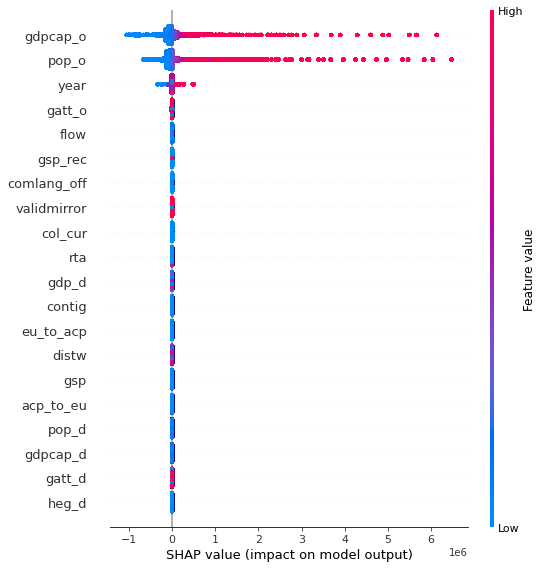

In [32]:
shap.summary_plot(shap_values, X_train)